# 지난 시간까지 배운점

In [33]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)
    

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

samples = "yang ji hoo"
char_set = list(set(samples)) #고유문자집합 --> 사실상 reverse dic임
char_dic = {letter:idx for idx, letter in enumerate(char_set)} # letter: idx형태로 바꿈

#hyper parameter
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

# data_setting
sample = [char_dic[c] for c in samples] #처음에 가지고 있는 letter들을 숫자로 바꿔주기
x_data = [sample[:-1]]
x_one_hot = [np.eye(input_size)[value] for value in x_data] #one_hot encodding
y_data = [sample[1:]]

# data transform
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)


In [66]:
X.shape

torch.Size([1, 10, 9])

In [70]:
# model
model = nn.RNN(input_size, hidden_size, batch_first = True).to(device)

# loss & optim
criterion = nn.CrossEntropyLoss().to(device)
optimizer= optim.Adam(model.parameters(), lr = learning_rate)

In [71]:
# training
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()

    # data setting
    outputs, _status = model(X)
    loss = criterion(outputs.view(-1,input_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    
    # 출력
    result = outputs.data.numpy().argmax(axis = 2)
    result_str = "".join([char_set[c] for c in np.squeeze(result)])
    
    if epoch % 10 == 0:
        print("[Epoch:{:04d} Loss: {:.4f}, ], pred_str: {}".format(epoch, loss.item(), result_str))
    
    

[Epoch:0000 Loss: 2.3319, ], pred_str: hyyhyyhyyh
[Epoch:0010 Loss: 1.0063, ], pred_str: angoji hoo
[Epoch:0020 Loss: 0.8259, ], pred_str: ang ji hoo
[Epoch:0030 Loss: 0.7874, ], pred_str: ang ji hoo
[Epoch:0040 Loss: 0.7665, ], pred_str: ang ji hoo
[Epoch:0050 Loss: 0.7575, ], pred_str: ang ji hoo
[Epoch:0060 Loss: 0.7537, ], pred_str: ang ji hoo
[Epoch:0070 Loss: 0.7510, ], pred_str: ang ji hoo
[Epoch:0080 Loss: 0.7493, ], pred_str: ang ji hoo
[Epoch:0090 Loss: 0.7481, ], pred_str: ang ji hoo


# 느낀점: 
모델을 만드는 것 자체는 어렵지 않았는데, data의 shape에 유의해야 한다. <br>
batch_size * sequence_length * input_size

여기서 나는 batch_size에 대해서 간과했던 것 같다.

그리고 output을 내는 과정에서도 아래와 같이 numpy형태의 변형 및 squeeze가 사용되니까 유의할 것 !

 #### 출력
    result = outputs.data.numpy().argmax(axis = 2)
    result_str = "".join([char_set[c] for c in np.squeeze(result)])
    

# 오늘 배우는 부분: Longseq

In [72]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")


In [76]:
char_set = list(set(sentence))
char_dic = {c:i for i,c in enumerate(char_set)}

{'h': 0,
 'i': 1,
 ',': 2,
 'n': 3,
 'u': 4,
 'p': 5,
 'l': 6,
 'g': 7,
 'r': 8,
 'w': 9,
 ' ': 10,
 'o': 11,
 'f': 12,
 'a': 13,
 'k': 14,
 't': 15,
 "'": 16,
 'b': 17,
 'e': 18,
 'c': 19,
 'm': 20,
 's': 21,
 'd': 22,
 'y': 23,
 '.': 24}

In [78]:
#hyper parameter
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10 # 우리가 입력으로 넣는 데이터의 길이로, hihell면 6이 되겠다 -> 여기서는 우리가 임의대로 정할 수 있다.
learning_rate = 0.1

In [88]:
# data를 sequence_length 만큼 잘라서 준비하자.
x_data = []
y_data = []

for i in range(len(sentence) - sequence_length):
    x_str = sentence[i: i + sequence_length]
    y_str = sentence[i+1: i + sequence_length + 1]
    print(i, x_str ,"->", y_str)
    x_data.append([char_dic[c] for c in x_str])
    y_data.append([char_dic[c] for c in y_str])
    
x_one_hot = [np.eye(dic_size)[x] for x in x_data]


0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [109]:
# transform
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

X.shape

torch.Size([170, 10, 25])

# Model 만들기
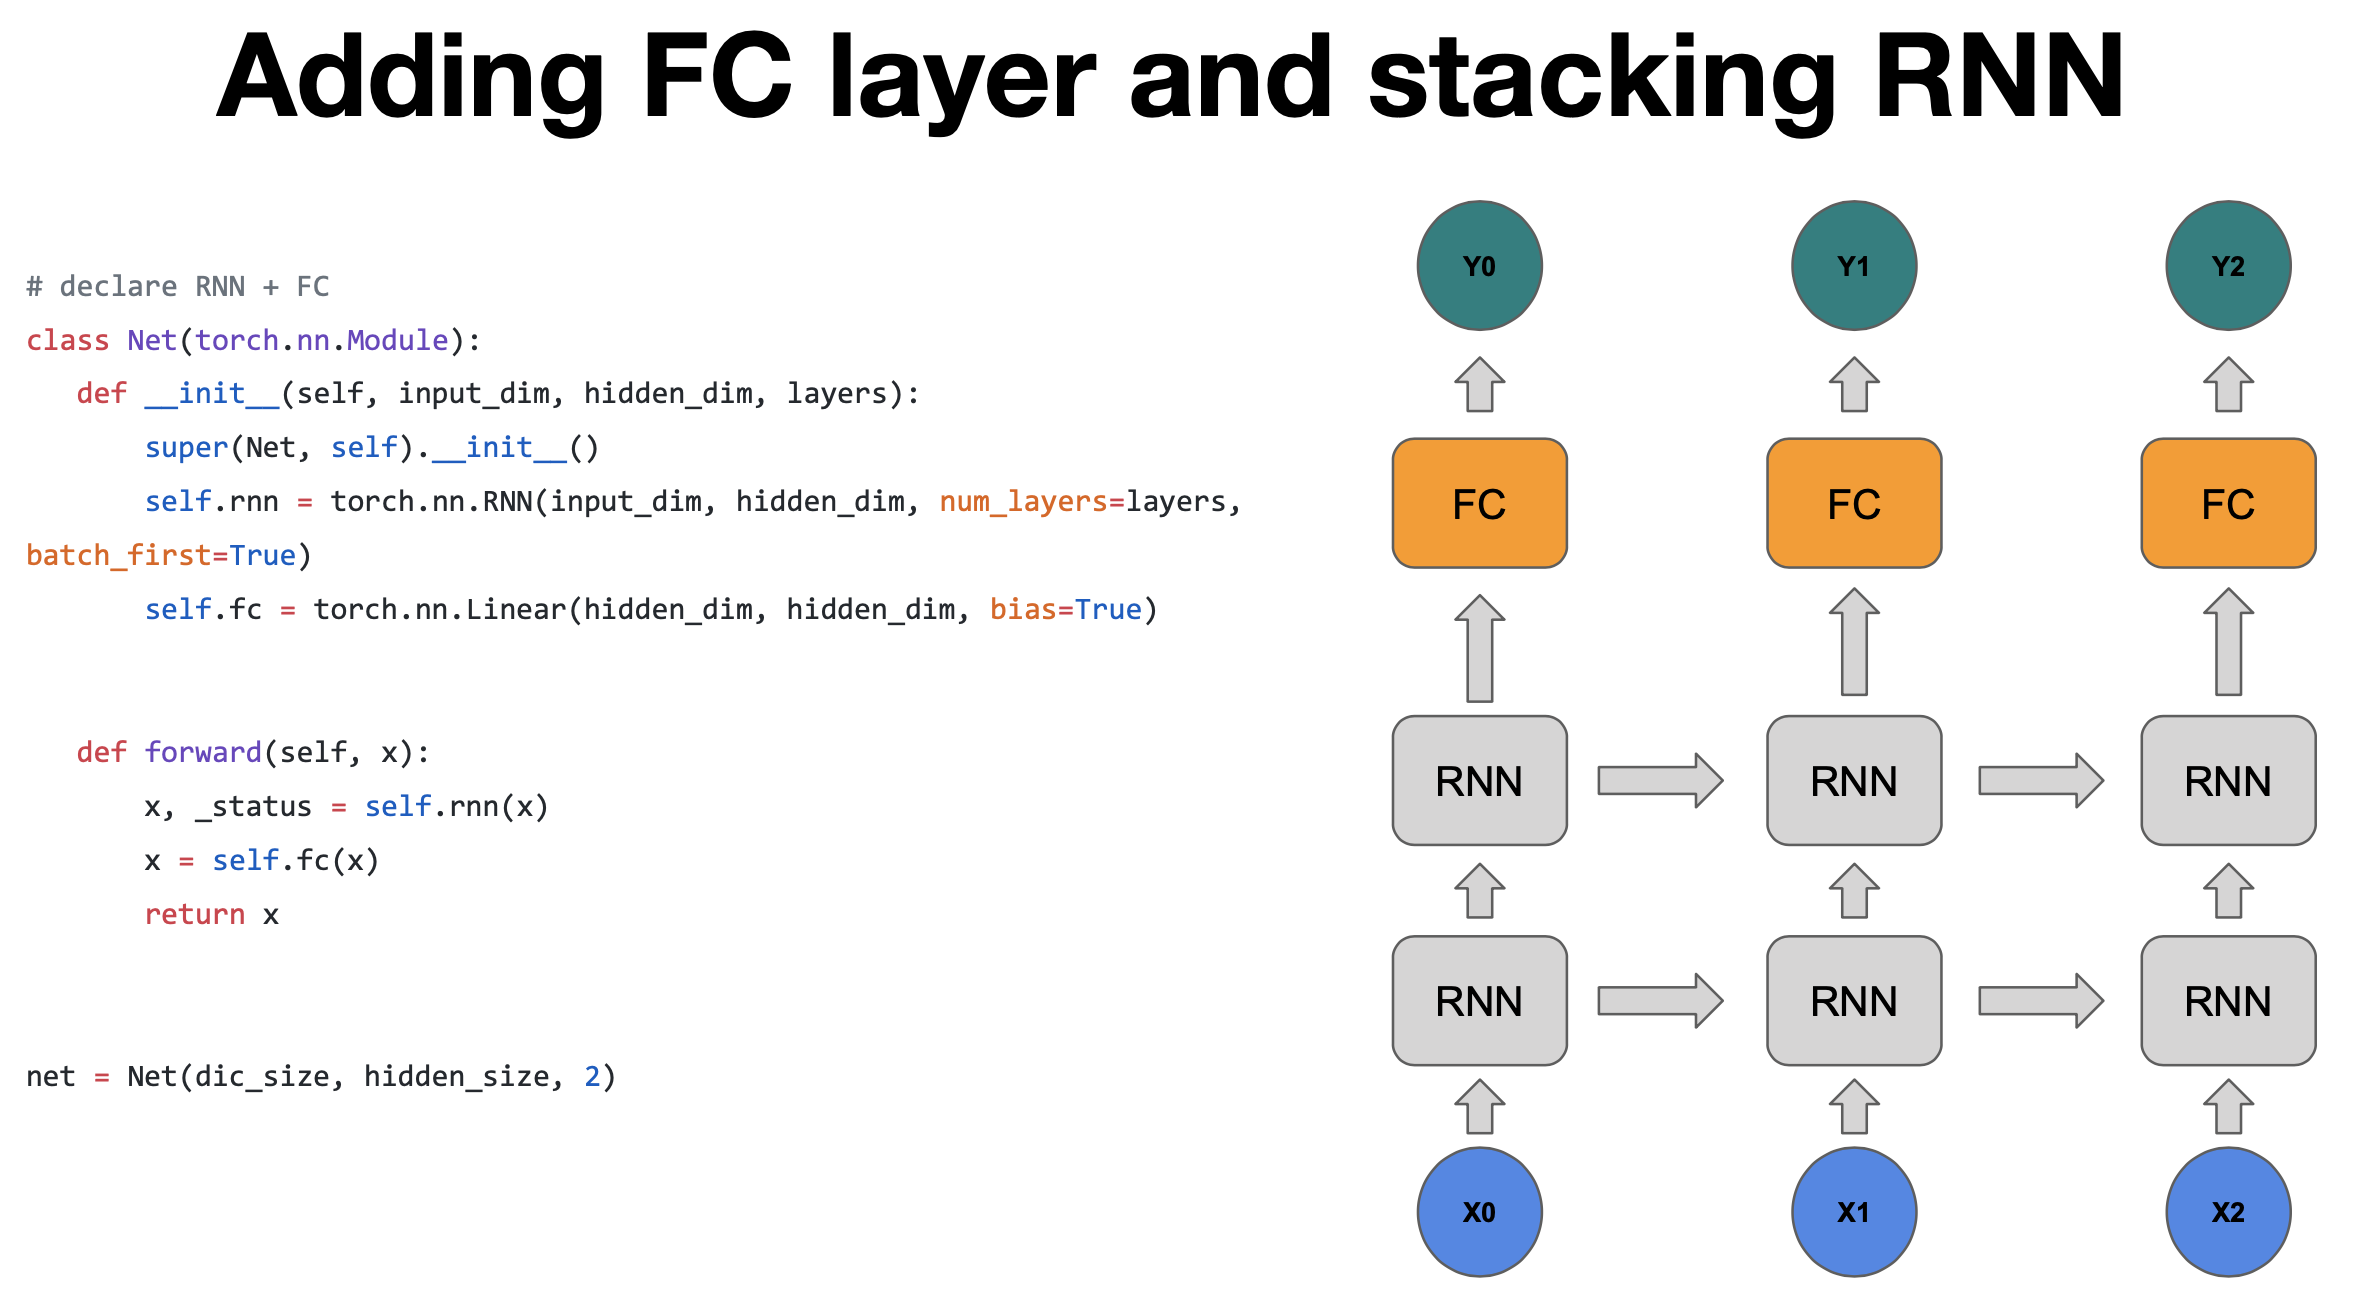

In [91]:
# declare RNN + FC
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net,self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias = True)
        
    def forward(self,x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x
        
net = Net(dic_size, hidden_size, 2)

In [93]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)


In [96]:
# training
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(X)
    
    loss = criterion(outputs.view(-1,dic_size), Y.view(-1)) #
    loss.backward()
    optimizer.step()
    
    results = outputs.argmax(dim = 2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0 :
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]] #한칸씩 이동했으니까, 맨뒤에 letter만 덧붙이면 되는구나.
            
    print(epoch, predict_str, "\n\n")
    
        
    
    

0 g tou want to build a ship, don't arum up people together to lollect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


1 f dou want to build a ship, don't arum up people together to lollect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


2 f dou want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


3 f dou want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


4 f tou want to build a ship, don't arum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


5 f dou want to build a ship, don't arum up people together to collect wood

47 m you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


48 m you want to build a ship, don't arum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


49 t you want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


50 l you want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


51 p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 


52 p you want to build a ship, don't drum up people together to collec

99 p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 




# 느낀점: 
- Sequence_length 단위로 잘라서 데이터를 학습시키는 방법을 사용할 수 있다. 이때, 데이터를 준비하는 과정이 쉽지 않은데, 정리해보면 다음과 같다.

1) char_set (고유문자) <br>
2) char_dic (문지: index) <br>
3) hyper_parameter 정하기: input_size, hidden_size, lr, sequence_length <br>
4) x_data/y_data 만들기: sequence_length단위로 자르기 <br>
5) x_one_hot 만들기: batch_size * sequence_length * input_size <br>
6) transform: torch.FloatTensor() or torch.LongTensor() <br>

- RNN 두 개 이용하기<br>
torch.nn.RNN(layers = 2)를 이용하면 RNN위에 RNN이 올라가진 구조를 만들 수 있다.